In [41]:
import seaborn as sns # import ness libraries / packages. 
import matplotlib.pyplot as plt
import pandas as pd 

"""
Decided to use Seaborn as my as it was more intuative than the others for me.
Easier for beginers and more display ready etc. Figsizes were used at either (8,6)
or (12,6) depending on what suited better. Hue was set as parameter where possible
on plots to allow for futher breakdowns by categorical data. Palette was set as a parameter
so it can be changed where viridis is not appropiate. However if none set will default to viridis.
Cmap used instead of palette for continous data. More comments left for details. 

"""
class Plotter: # plotter Class created. 
    def __init__(self, dataframe, default_palette="viridis"): # parameters set, viridis used for palette scheme. 
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)  
        sns.set_style("whitegrid") # whitegrid, a typical sns grid, used for plot backgrounds.

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None): 
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None): # bins set a 25 by default, as a middle of road metric. 
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, # kde for better visualization. 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45) # X column labels often didn't fit, so rotation helps that.  
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None): # box width set to 0.5 by default for better visialisation. 
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, # jitter allows better visulation of individual points. 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10): # another style of joint plot using Kernal Density estimate (kde) instead of scatter. 
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02) # gives a title and slighty moves it away from the main axis. 
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"]) # filters for numerica data only. 
        plt.figure(figsize=figsize)
        corr = numeric_df.corr() # inbuilt corralation matrix function
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f") #cmap used as data is continous, fmt sets all values to 2dp. 
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"]) 
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]): # palette set to red and green.
        total_nulls = self.dataframe.isna().sum().sum() # takes the sum of all the nulls in each column. 
        total_values = self.dataframe.size - total_nulls # finds the total values. 
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("") # x label unesscary. 
        plt.show()


In [42]:
planets = sns.load_dataset("planets")  # inbuilt generic sns dataset to test - planets beacause they are cool. 

print(planets) # dataset printed. 
print("\n")
print(planets.columns) # columns printed. 

real_mass = planets["mass"].dropna() # drops nulls of mass.

print("\r")
print(real_mass.nunique()) # print unique values of mass.


               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

381


In [43]:
print(planets.columns) # all column names.
print(planets.nunique()) # number of unquie observations in each column
print("\r")
planets.info() # info about dataset. 

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')
method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_29031/2621442629.py:22: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue,


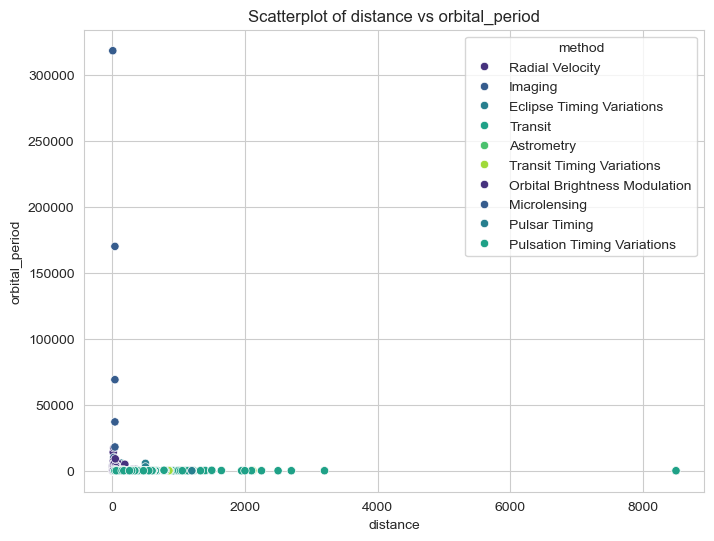

In [44]:
test_plotter = Plotter(planets) #intialize Class. 

test_plotter.scatterplot("distance", "orbital_period", hue="method") # call scatterplot w/ hue. 

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_29031/2621442629.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, # kde for better visualization.


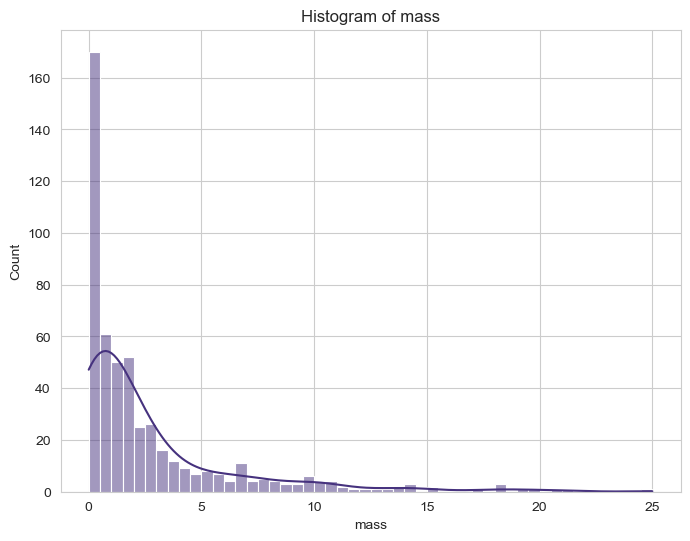

In [45]:
test_plotter.histogram("mass", bins=50) # call histogram, changing the bin parameter for testing. 

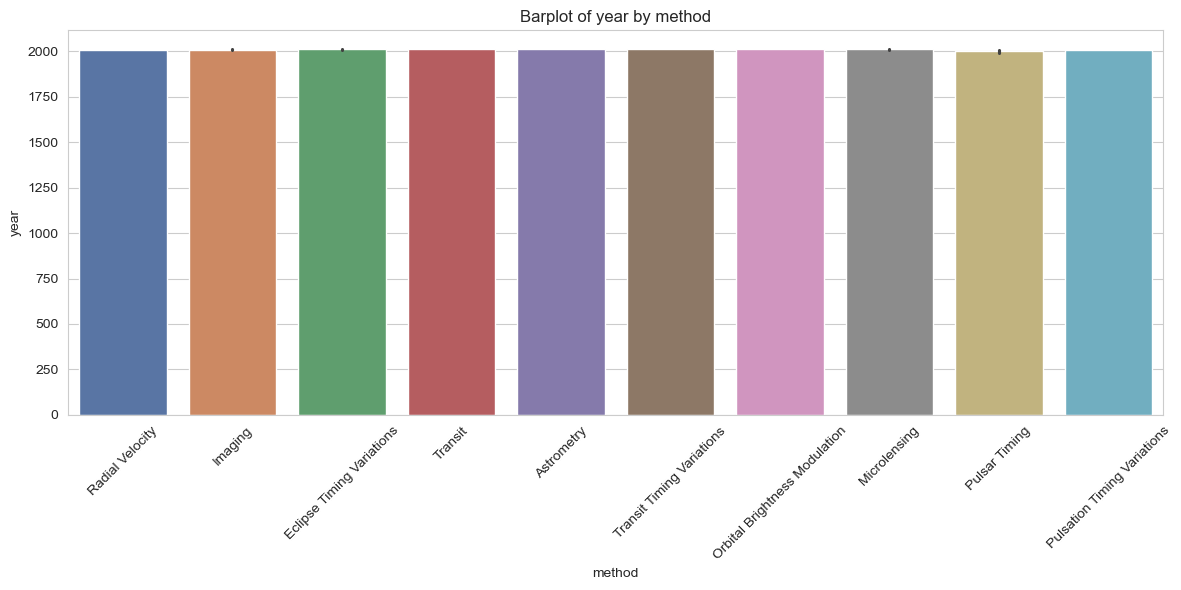

In [46]:
test_plotter.barplot("method", "year", hue="method", palette="deep") # call barplot, palette changed for clarity.


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_29031/2621442629.py:44: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width,


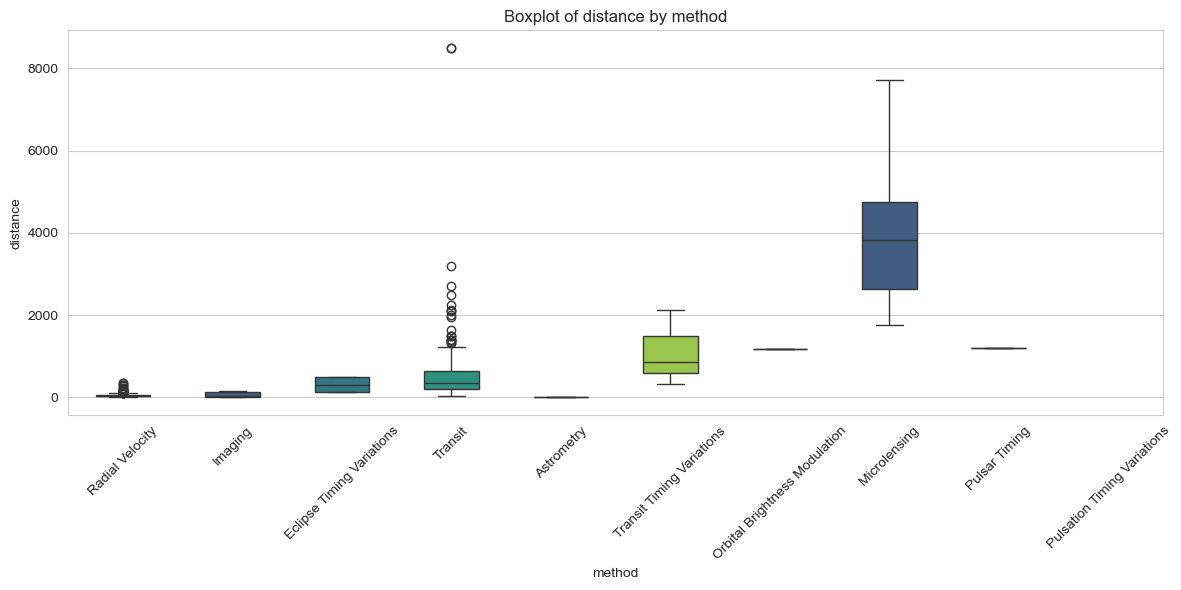

'\nNatively the boxes came out as V thin so changed method to inately have 0.5 width, and can always customise. \n\n'

In [47]:
test_plotter.boxplot("method", "distance", hue="method") # test boxplot

"""
Natively the boxes came out as V thin so changed method to inately have 0.5 width, and can always customise. 

"""

/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_29031/2621442629.py:53: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, # jitter allows better visulation of individual points.


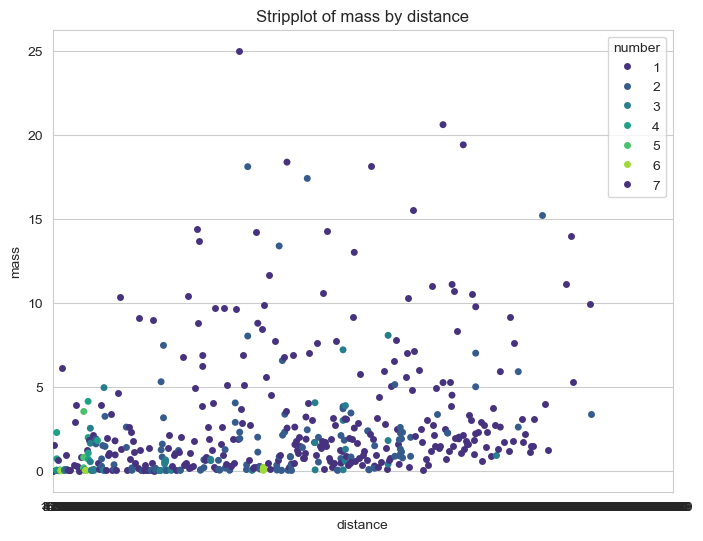

In [48]:
test_plotter.stripplot( "distance", "mass", hue="number") # strplot called, didn't change palette just for exmaple. 

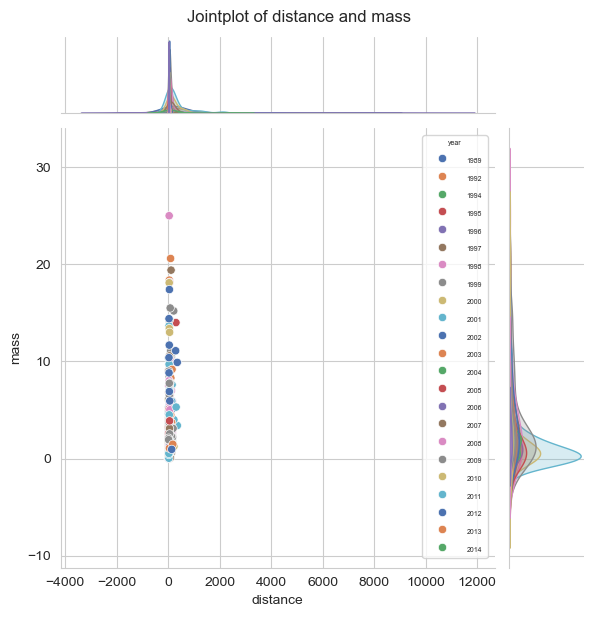

'\nAlthough I find it cool, it the lack of colours in viridis, which is ment for more continous data,\nstarted to throw up warnings in here. This lead me to changing the parameters of every plot method\nto allow the changing the colour palette if nesscesary, or cmap in the case of continous plots. \ndefaults to the Class viridis if nothing specified. \n\n'

In [49]:
test_plotter.jointplot("distance", "mass", hue="year", legend_fontsize=5, palette="deep")
# legend size changed to fir the many values, palette changed for more colours. 

"""
Although I find it cool, it the lack of colours in viridis, which is ment for more continous data,
started to throw up warnings in here. This lead me to changing the parameters of every plot method
to allow the changing the colour palette if nesscesary, or cmap in the case of continous plots. 
defaults to the Class viridis if nothing specified. 

"""

/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, y=self.y, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:1889: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


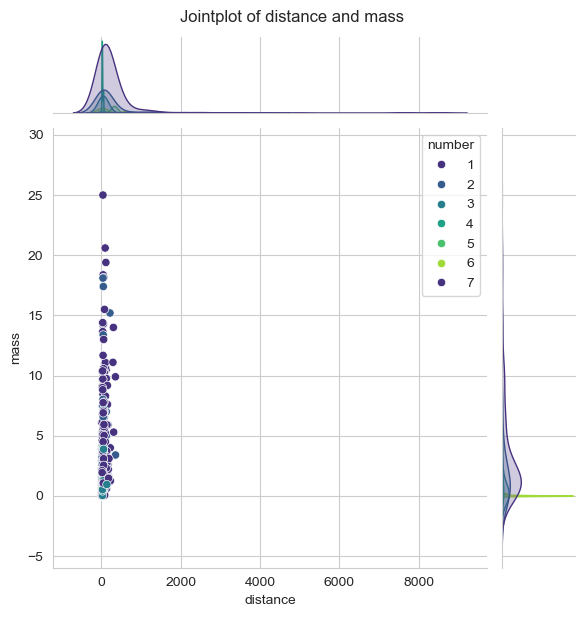

In [50]:
test_plotter.jointplot("distance", "mass", hue="number")  # different jointplot called. 

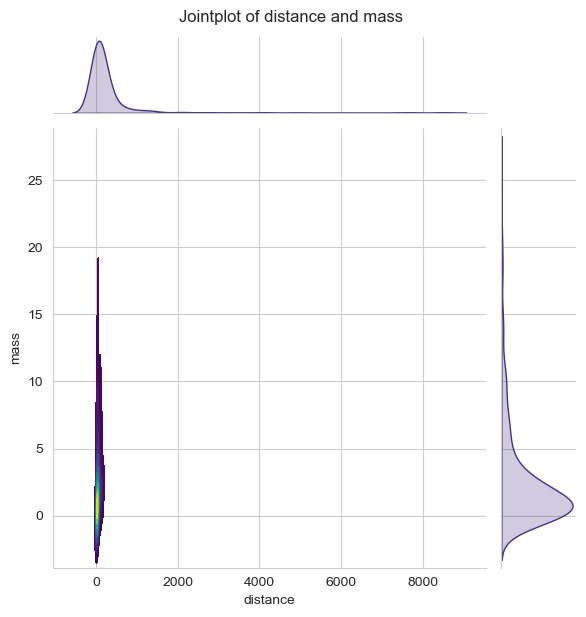

In [51]:
test_plotter.jointplotkde("distance", "mass") # testing kde jointplot. 

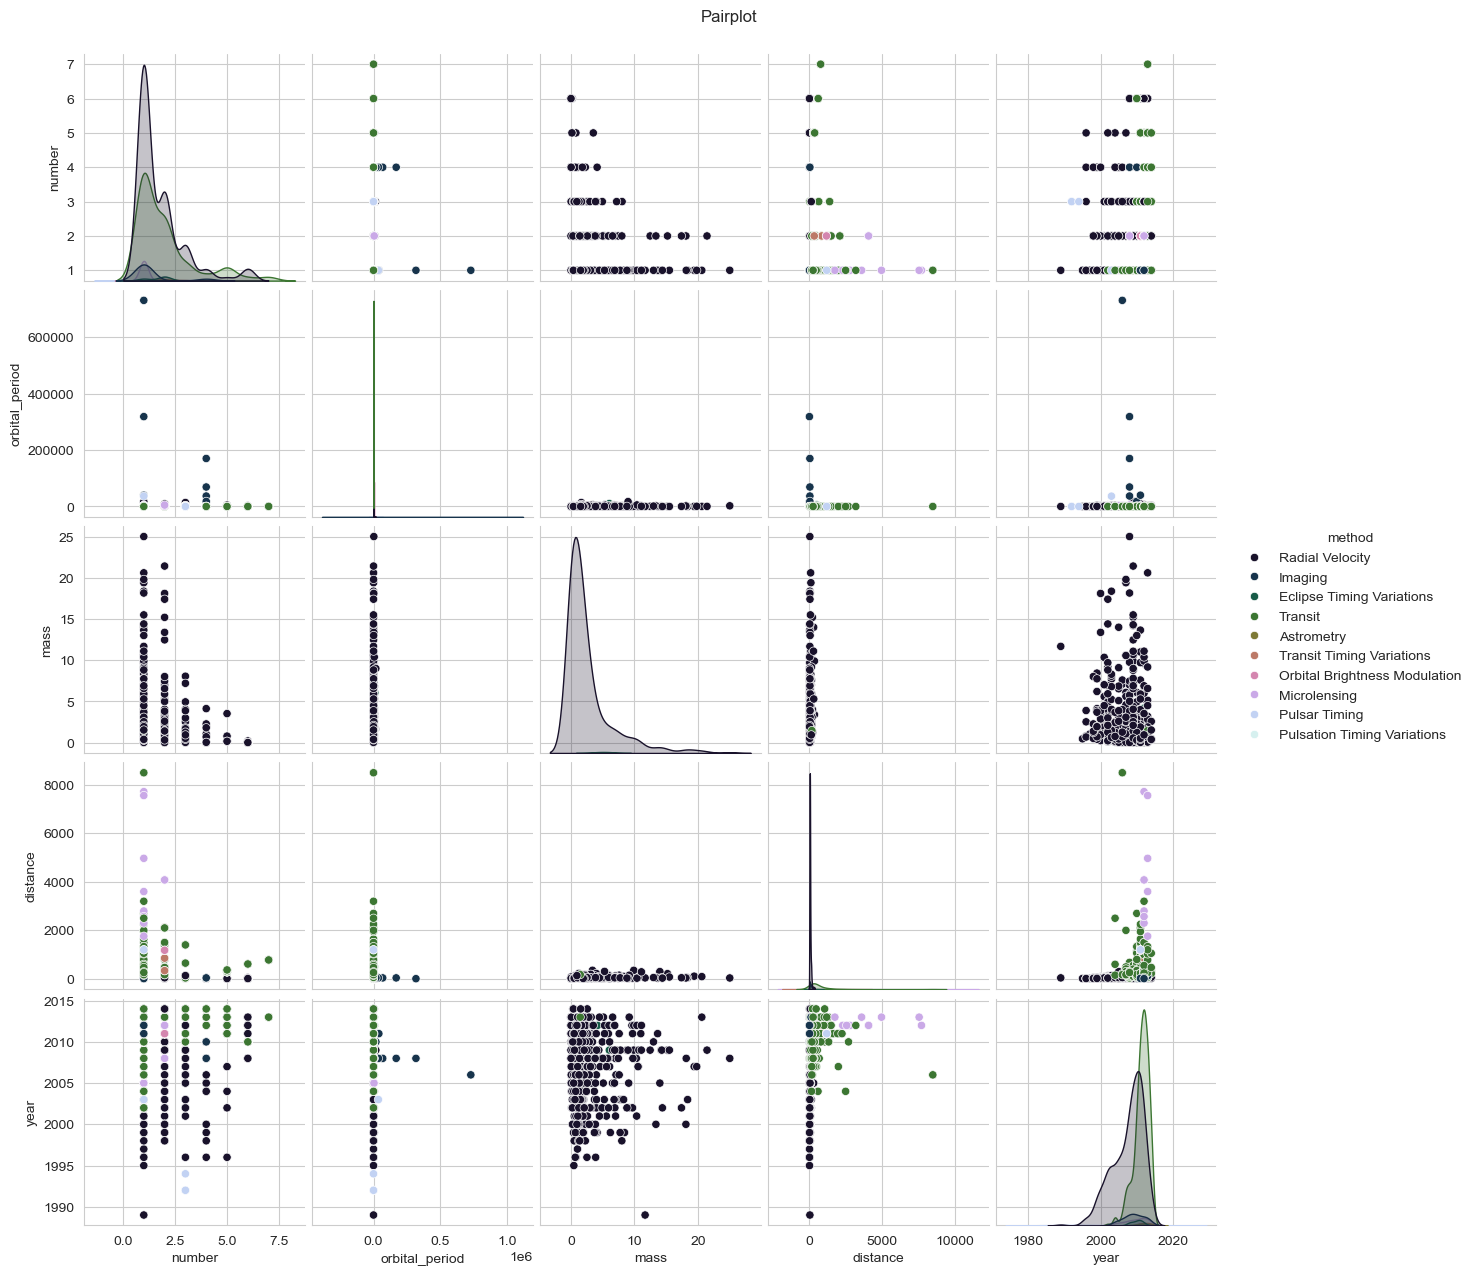

In [52]:
test_plotter.pairplot(hue="method", palette="cubehelix") # pairplot tested with different colour palette.

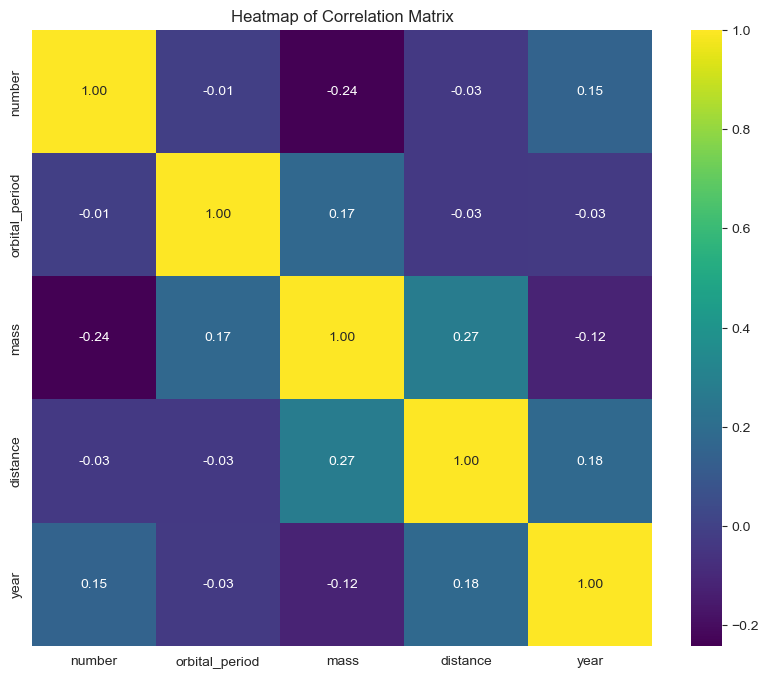

In [53]:

test_plotter.heatmap() # heatplot test. 

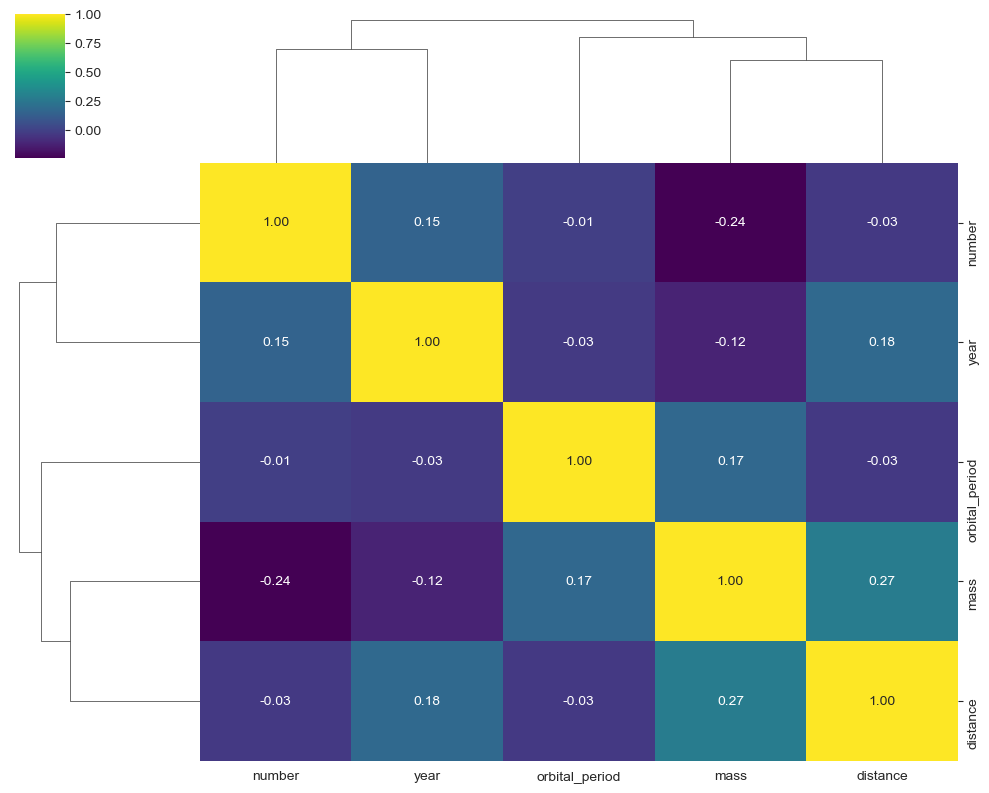

In [54]:
test_plotter.clustermap() #clustermap test.

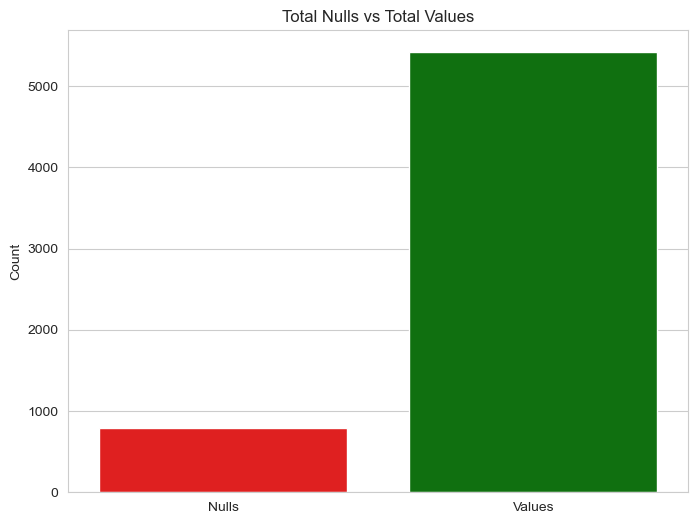

In [ ]:
test_plotter.nulls_barplot() # null value barplot test. 